In [1]:
!pip install tensorflow numpy matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
from google.colab import files

uploaded = files.upload()  # Envia o arquivo .zip para o Colab


Saving 200ChildrenPhotos.zip to 200ChildrenPhotos.zip


In [5]:
import zipfile
import os

zip_path = '200ChildrenPhotos.zip'  # Substitua pelo nome do seu arquivo ZIP
extract_to = '/content/Filhos'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Verifique o conteúdo extraído
print("Arquivos extraídos para:", extract_to)


Arquivos extraídos para: /content/Filhos


In [6]:
dataset_dir = '/content/Filhos'  # Caminho da pasta extraída
batch_size = 32
img_size = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.2,  # 20% para validação
    subset="training",
    seed=123)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.2,
    subset="validation",
    seed=123)


Found 428 files belonging to 1 classes.
Using 343 files for training.
Found 428 files belonging to 1 classes.
Using 85 files for validation.


Classes detectadas: ['Filhos200']


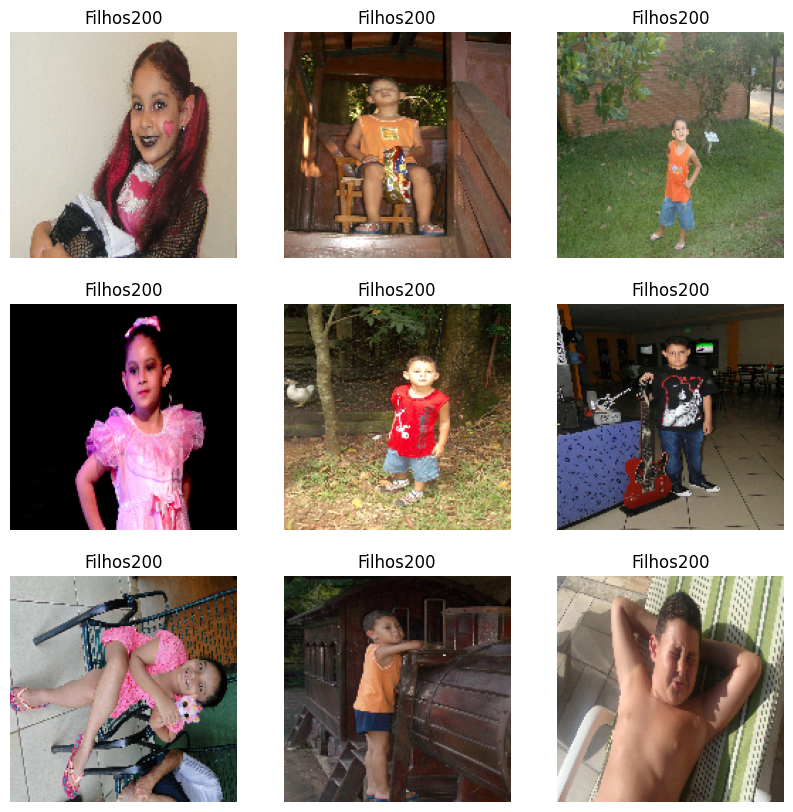

In [7]:
class_names = train_dataset.class_names
print("Classes detectadas:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [8]:
dataset_dir = '/content/Filhos'  # Caminho correto após extração

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,  # Use o caminho correto aqui
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.2,  # 20% para validação
    subset="training",
    seed=123
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,  # Use o mesmo caminho aqui
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.2,
    subset="validation",
    seed=123
)




Found 428 files belonging to 1 classes.
Using 343 files for training.
Found 428 files belonging to 1 classes.
Using 85 files for validation.


In [9]:
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))


In [10]:
base_model = applications.MobileNetV2(input_shape=(160, 160, 3),
                                       include_top=False,
                                       weights='imagenet')

base_model.trainable = False  # Congela os pesos da base


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')  # Altere o número de classes conforme necessário
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5  # Altere o número de épocas conforme necessário
)


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8005 - loss: 0.3184 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 1.0000 - loss: 8.4644e-04 - val_accuracy: 1.0000 - val_loss: 9.3935e-04
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 1.9703e-04 - val_accuracy: 1.0000 - val_loss: 5.6120e-04
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 9.1565e-05 - val_accuracy: 1.0000 - val_loss: 4.6485e-04
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 7.5918e-05 - val_accuracy: 1.0000 - val_loss: 4.3283e-04


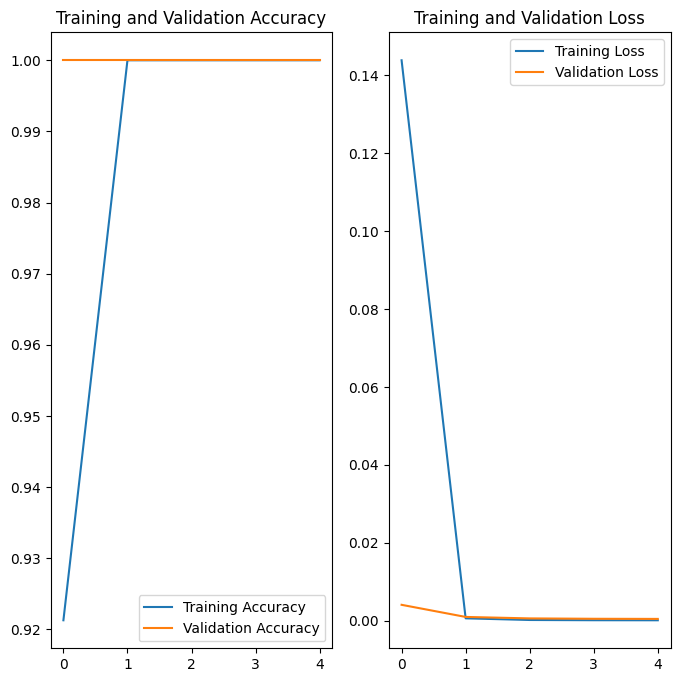

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [14]:
model.save('transfer_learning_model_200ChildrenPhotos.keras')  # Novo formato


In [15]:
!ls

200ChildrenPhotos.zip  Filhos  sample_data  transfer_learning_model_200ChildrenPhotos.keras


In [16]:
from google.colab import files
files.download('transfer_learning_model_200ChildrenPhotos.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>